# Otimização

Em um sentido mais amplo, a otimização consiste em buscar a melhor solução possível para um determinado problema.

Em diversos problemas de engenharia a otimização inicia pelo estágio da criação de um modelo matemático do sistema que deseja-se otimizar e, em seguida, a aplicação de técnicas matemáticas para maximizar ou minimizar uma função que caracteriza o objetivo ou o custo.

O problema de otimização pode ser mais formalmente definido como:

\begin{equation} 
minimizar f(x), x \in \Omega
\end{equation}

Outra formulação comum é quando queremos achar o máximo de uma função, ou então:

\begin{equation} 
maximizar f(x), x \in \Omega
\end{equation}

O caso mais simples consiste quando a função que deseja-se otimizar é unidimensional.
Neste caso, temos que $x \in \mathbb{R}$

## Exemplo


Por exemplo, suponha que desejamos projetar um recipiente cilíndrico capaz de armazenar **1L** de volume.
Desejamos otimizar o custo de produção do recipiente.

Podemos simplificar o problema e associar o custo de produção à quantidade de material utilizado.
Desta forma, o problema transforma-se em saber quais as dimensões do cilindro que minimizam a quantidade de material utilizada.

Sabendo que o volume é dado por:

\begin{equation} \label{eq:otimizacao1}
V = h\pi r^2
\end{equation}

enquanto que a área é dado pela soma da área da base, do topo e da lateral:

$
A(r,h) = \pi r^2 + \pi r^2 + 2\pi r h
$

Então, substituindo o volume desejado na equação \ref{eq:otimizacao1} podemos isolar o valor de $h$ e encontrar a equação:

$
A(r) = 2\pi r^2 + 2/r
$

Chegamos então a formulação do nosso problema:


\begin{matrix}
\min & A(r), r \in \mathbb{R}^+
\end{matrix}


Podemos então utilizar a função `minimize` para determinar o menor raio:

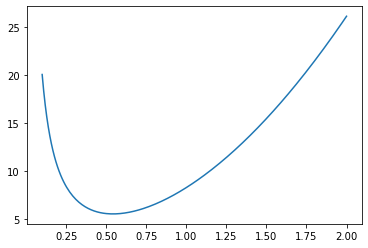

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# funcao que calcula a area, baseado no raio
def A(r):
    return 2*pi*r**2 +2/r

X = np.linspace(0.1, 2.0, 200)
Y = A(X)

plt.plot(X,Y)

In [4]:
import scipy.optimize as opt
from math import pi

#opt.minimize_scalar(A, bracket=[0.1, 10])
opt.minimize(A, 0.1)

      fun: 5.535810445932086
 hess_inv: array([[0.02653506]])
      jac: array([5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([0.54192606])

## Otimização - derivada

Lembre-se do cálculo que os pontos de elevação máxima e mínima correspondem, matematicamente, aos pontos onde a derivada da função é igual a zero.

Desta forma, uma primeira abordagem baseado no cálculo é  calcular analiticamente a derivada da função que desejamos minimizar (ou maximizar) e, em seguida, determinar os zeros da derivada.

### Exemplo

Suponha que em uma solução aquosa encontram-se dissolvidos íons $H^+$ e $OH^-$, de forma que suas concentrações obedeçam à relação $\left[ H^+ \right] \left[ OH^- \right] = 10^{-14}$.

Determine qual a concentração de $H^+$ que minimiza a soma de $H^+ + OH^-$.

A função que queremos minimizar é:

\begin{equation}
f(H^+,OH^-) = \left[H^+\right] + \left[OH^-\right]
\end{equation}

A partir da restrição fornecida, podemos substituir uma das concentrações e simplificar o problema para:

\begin{equation}
f(H^+) = \left[H^+\right] + \dfrac{10^{-14}}{\left[H^+\right]}
\end{equation}

cuja derivada pode ser facilmente obtida em:

\begin{equation}
f'(H^+) = 1 - \dfrac{10^{-14}}{\left[H^+\right]^2}
\end{equation}

Neste ponto, podemos utilizar qualquer uma das técnicas para encontrar o zero desta função.

Por exemplo, resolvendo analiticamente obtemos o valor:

$
\left[H^+\right] = 10^{-7}
$

## Otimização - abordagem numérica

Da mesma forma que vimos no problema de determinação de raízes, podemos encontrar um problema onde não seja possível determinar analiticamente a derivada de uma função.

Neste caso, podemos utilizar um método numérico para determinar o máximo ou mínimo de uma função.

No **método da razão áurea**, vamos, similarmente ao que foi feito na bissecção, buscar um subintervalo no qual o ótimo da função deve se encontrar.
Supomos também que só existe um único ótimo no intervalo $(x_l, x_u)$

Entretanto, ao invés de utilizarmos apenas 1 ponto, vamos utilizar 2 pontos interiores, calculados conforme seguem:

\begin{equation}
x_1 = x_l + d
\end{equation}

\begin{equation}
x_2 = x_u - d
\end{equation}

onde

\begin{equation}
d = (\phi - 1)(x_u - x_l)
\end{equation}

e $\phi = \frac{1+\sqrt{5}}{2}$ é a razão áurea, originalmente descrita por Euclides. 

Em seguida, compara-se o valor da função nestes dois pontos determinando-se assim em qual subinvervalo o mínimo deve estar localizado.

O teste a ser realizado é:

se $f(x_1) < f(x_2)$ então deve-se buscar no intervalo da direita, definido por $(x_2, x_u)$.

se $f(x_2) < f(x_1)$ então deve-se buscar no intervalo da esquerda, definido por $(x_l, x_1)$.


<div>
<img src="figuras/otimizacao_razaoaurea.svg" width="400"/>
</div>

In [137]:
from numpy import sin
import math as m

def funcao(x):
    return x**2/10 - 2*sin(x)

def otimizacao_aurea_ingenua(f, xl, xu, eps):
    erro = abs(xu - xl)/2
    phi = (1+m.sqrt(5))/2
    while erro > eps:
        d = (phi - 1)*(xu - xl)
        x1 = xl + d
        x2 = xu - d
        if f(x1) < f(x2):
            xl = x2
            xmin = x2
        else:
            xu = x1
            xmin = x1
        erro = abs(xu - xl)/2
        print(erro)
    return xmin

In [138]:
otimizacao_aurea_ingenua(funcao, 0, 4, 0.001)

1.2360679774997898
0.7639320225002104
0.4721359549995795
0.29179606750063103
0.18033988749894858
0.11145618000168256
0.06888370749726613
0.042572472504416425
0.026311234992849708
0.016261237511566717
0.01004999748128299
0.006211240030283727
0.003838757450999264
0.002372482579284463
0.001466274871714801
0.0009062077075696617


1.4266717891007419

In [5]:
import scipy.optimize as opt

sol = opt.minimize_scalar(funcao, bracket=[0,4])
print('Minimize scalar:\n',sol)

sol = opt.minimize(funcao, 0)
print('\nMinimize:\n', sol)

Minimize scalar:
      fun: -1.7757256531474153
    nfev: 14
     nit: 10
 success: True
       x: 1.427551781310228

Minimize:
       fun: -1.775725653147415
 hess_inv: array([[0.45885959]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([1.42755177])


## Gradiente

Existem diversas formas de resolver o problema de otimização no caso de funções multidimensionais.

Uma família delas baseia-se na derivada da função e, de forma parecida com o método de Newton, utilizamos a derivada multidimensional (mais conhecido como **gradiente**) para indicar a direção que deverá ser percorrida.

O algoritmo busca, em cada iteração, a direção com maior declividade, e caminha um passo nesta direção.
Em seguida, realiza os mesmos cálculos para o próximo passo.
O comportamento observado é o de uma esfera descendo por um vale.

Matematicamente, podemos definir o algoritmo da seguinte forma:

Dado uma função $f = f(x_1, x_2, \ldots, x_n)$, o gradiente dela é definido como:

\begin{equation}
\nabla f = \begin{bmatrix}
\dfrac{\partial f}{\partial x_1} \ldots \dfrac{\partial f}{\partial x_n} 
\end{bmatrix}
\end{equation}

O algoritmo baseado na descida do gradiente busca, em cada instante, caminhar um passo de tamanho $\gamma$ na direção de maior declividade, atualizando sua posição conforme a equação:

\begin{equation}
x_{i+1} = x_i - \gamma \nabla f(x_i)
\end{equation}

Exemplo:

Considere a função 

$
f(x_1, x_2) = 2 + x_1 - x_2 + 2x_1^2 + 2x_1x_2 + x_2^2
$

cujo gradiente é dado por:

$
\nabla(x_1, x_2) = \begin{bmatrix}1 + 4x_1 + 2x_2 &,& -1 +2x_1 +2x_2 \end{bmatrix}
$


In [13]:
import scipy.optimize as opt

def f(X):
    # 2 + x1 - x2 +2x1^2 + 2x1x2 + x2^2
    return 2 + X[0] - X[1] + 2*X[0]**2 +2*X[0]*X[1] + X[1]**2
    
def jacobiano(X):
    # [1 + 4x1 +2x2 ; -1 + 2x1 + 2x2]
    j11 = 1 + 4*X[0] + 2*X[1]
    j12 = -1 +2*X[0] +2*X[1]
    return [j11, j12]

opt.minimize(f, x0=[0,0], jac=jacobiano)

      fun: 0.75
 hess_inv: array([[ 0.5, -0.5],
       [-0.5,  1. ]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-1. ,  1.5])

In [14]:
def otimizacao_gradiente(f, j, x0, step, n):
    xi = x0
    X = []
    Y = []
    for i in range(n):
        xi = xi - step*np.array(j(xi))
        X.append(xi[0])
        Y.append(xi[1])
    return xi, X, Y

x, Xgrad,Ygrad = otimizacao_gradiente(f,jacobiano, [1.5,2.5], 0.1, 500)
print(x)

[-1.   1.5]


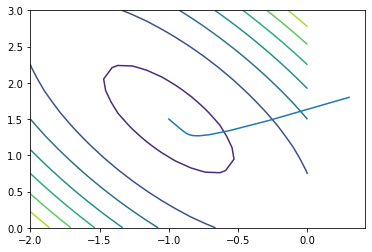

In [24]:
import matplotlib.pyplot as plt
import numpy as np

amostras = 20
XL = np.linspace(-2.0, 0.0, amostras)
YL = np.linspace(0.0, 3.0, amostras)

Z = np.empty([amostras,amostras])
for ix,x in enumerate(XL):
    for iy,y in enumerate(YL):
        Z[ix,iy] = f([x,y])

plt.contour(XL, YL, Z)
plt.plot(Xgrad,Ygrad)

## Exemplo 1

[CHAPRA, Ex. 7.26] A taxa de crescimento específico de uma cultura que produz um antibiótico é uma função da concentração de alimento $c$:

\begin{equation}
g = \dfrac{2c}{4 + 0,8c + c^2 +0,2c^3}
\end{equation}

O crescimento tende a zero em concentrações muito baixas em decorrência da limitação de alimentos, e também tende a zero em concentrações muito altas por causa do efeito de toxidade.
Encontre o valor no qual o crescimento é maximo.

<img src="figuras/otimizacao_ex7_26.svg" width="500"/>

In [27]:
import scipy.optimize as opt
def g(c):
    return -2*c/(4 + 0.8*c + c**2 + 0.2*c**3)

opt.minimize(g, 0)

      fun: -0.36963485225217874
 hess_inv: array([[5.87061889]])
      jac: array([-1.56462193e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([1.56788847])

## Exemplo 2

Um fazendeiro deseja cercar uma área de sua região usando um formato retangular.
Uma das laterais faz fronteira com um área previamente cercada, de forma que ele não precisará gastar material neste lado.
Supondo que ele possui 100m de cerca, quais as dimensões que **maximizam** a área cercada?

In [26]:
def area(c):
    return -c*(100-2*c)

sol = opt.minimize(area,1)
print(sol)
c = sol.x
l = 100 - 2*c
print(c,l)

      fun: -1250.0
 hess_inv: array([[0.16666656]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([25.0000001])
[25.0000001] [49.99999981]


## Exemplo 3

Observe o gráfico das curvas de nível para a função 
\begin{equation}
f(x_1, x_2) = (x_1 - 1)^2 + (x_2 - 3)^2 - 2
\end{equation}

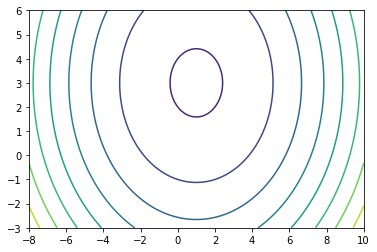

In [29]:
import numpy as np

# definindo a funcao f(x,y)
def f(X):
    return (X[0] - 1)**2 + (X[1] - 3)**2 - 2

amostras = 100
XX = np.linspace(-8.0, 10.0, amostras) # definindo o intervalo em x
YY = np.linspace(-3.0, 6.0, amostras) # definindo o intervalo em y
ZZ = [ f([x,y]) for x in XX for y in YY ] # calculando o valor de f(x,y)
ZZ = np.reshape(ZZ, (amostras, amostras)).T # redimensionando em forma de matriz

plt.contour(XX, YY, ZZ)

* Esta função apresenta um máximo ou mínimo na região destacada?
* Qual o ponto onde isto ocorre?
* Crie uma função que calcule o gradiente de f(x,y)
* Determine o mínimo utilizando a função `minimize`

In [46]:
def f(X):
    return (X[0] - 1)**2 + (X[1] - 3)**2 - 2

def grad(X):
    return [2*X[0]-2, 2*X[1]-6]

opt.minimize(f, [0,0], jac=grad)

      fun: -2.0
 hess_inv: array([[ 0.95, -0.15],
       [-0.15,  0.55]])
      jac: array([ 0.0000000e+00, -8.8817842e-16])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1., 3.])

## Programação linear

Uma formulação comum nos problemas de otimização é chamado de programação linear.

Nestes casos, o problema é sujeito a restrições lineares, tal que ele pode ser descrito como:

\begin{array}{ll@{}}
min & \sum c_i x_i \\
\text{sujeito à:} & A_lx \leq b_l \\
& A_ex = b_e \\
& l \leq x \leq u
\end{array}

onde 
$\sum c_i x_i$ é a chamada função objetivo que desejamos minimizar, $x_i$ é o vetor contendo as variáveis de decisão, $A_e$, $b_e$, $A_l$, $b_l$, $l$ e $u$ são matrizes ou vetores que modelam as restrições lineares do problema.

### Exemplo: 

Uma empresa possui 2 fábricas localizadas nas cidades $A$ e $B$.
Ela possui 2 fornecedores para suas fábricas: $X$ e $Y$.

A quantidade máxima de insumos que eles podem disponibilizar são dados na tabela abaixo:

| X | Y | 
| --- | --- |
| 70 | 120 |

O custo de transporte de cada fornecedor é dado pela tabela a seguir:

|  | X   | Y   |
|------|------|------|
|   A  | 70 | 150 |
|   B  | 100 | 110 |

Além disso, as fábricas necessitam das seguintes quantidades de insumo para funcionar:

| $A$ | $B$ |
| --- | --- |
| 80 | 100 |

A variável de decisão que temos neste problema refere-se à quantidade de insumos que devem ser transportados de cada fornecedor para cada uma das fábricas.

Ou seja, $x = \begin{bmatrix} X_A \\ X_B \\ Y_A \\ Y_B  \end{bmatrix}$,

onde, por exemplo, $X_A$ refere-se à quantidade de insumos adquiridos no fornecedor $X$ e enviados para a fábrica $A$.

O custo será dado por:

\begin{aligned}
c &= 70 \cdot X_A + 100 \cdot X_B + 150\cdot Y_A+110\cdot Y_B \\
  &= \begin{bmatrix} 70 & 100 & 150 & 110 \end{bmatrix} x
\end{aligned}

A quantidade máxima de insumos que eles podem fornecer pode ser representado por meio de:

$
\begin{bmatrix}
1 & 1 & 0 & 0    \\
0 & 0 & 1 & 1    \\
0 & 0 & 0 & 0   \\
0 & 0 & 0 & 0   
\end{bmatrix}\begin{bmatrix} X_A \\ X_B \\ Y_A \\ Y_B  \end{bmatrix}
\leq
\begin{bmatrix} 70 \\ 120 \\ 0 \\ 0  \end{bmatrix}
$

e o requisito das fábricas pode ser modelado como:

$
\begin{bmatrix}
1 & 0 & 1 & 0   \\
0 & 1 & 0 & 1   \\
0 & 0 & 0 & 0   \\
0 & 0 & 0 & 0   \\
\end{bmatrix}\begin{bmatrix} X_A \\ X_B \\ Y_A \\ Y_B  \end{bmatrix}
=
\begin{bmatrix} 80 \\ 100 \\ 0 \\ 0  \end{bmatrix}
$

In [139]:
import scipy.optimize as opt
c = np.array([70, 100, 150, 110])
Aub = np.array([[1 , 1, 0, 0], [0, 0, 1, 1], [0, 0, 0, 0], [0, 0, 0, 0]])
bub = np.array([70, 120, 0, 0])
Aeq = np.array([[1 , 0, 1, 0], [0, 1, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]])
beq = np.array([80, 100, 0, 0])
opt.linprog(c, A_ub=Aub, b_ub=bub, A_eq=Aeq, b_eq=beq)

     con: array([6.80201566e-07, 8.54629334e-07, 0.00000000e+00, 0.00000000e+00])
     fun: 17399.999850848995
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([5.84546328e-07, 1.00000010e+01, 0.00000000e+00, 0.00000000e+00])
  status: 0
 success: True
       x: array([6.99999994e+01, 1.78216736e-09, 9.99999991e+00, 9.99999991e+01])

## Exemplo 4

Suponha que um sítio precise alimentar suas galinhas.
Ela pode utilizar 3 tipos de ração (A, B e C), e o custo de cada um é R\\$6,00 e R\\$9,00  e R\\$12,00 respectivamente.
As galinhas necessitam de uma porção mínima de 3g de proteína e 5g de cálcio.
A ração A provê 0,2g/un de proteína e 0,4g/un de cálcio, a ração B provê 0,6 de proteína e 0,6 de cálcio, enquanto que a ração C provê 0,7 de proteína e 0,8 de cálcio.

Qual a melhor forma de misturar as rações para atingir o balanço nutricional desejado com menor custo possível?

As variáveis de decisão serão: 

* $x_1$: quantidade de ração A
* $x_2$: quantidade de ração B
* $x_3$: quantidade de ração C

E o problema pode ser formulado como:

\begin{array}{ll@{}}
min &
\begin{bmatrix}
6 & 9 & 12
\end{bmatrix} 
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix} 
\\
\text{sujeito à:} & 
\begin{bmatrix}
0,2 & 0,6 & 0,7 \\
0,4 & 0,6 & 0,8
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
\geq 
\begin{bmatrix}
3 \\ 5
\end{bmatrix}
\end{array}


In [48]:
c = np.array([6,9,12])
A = -np.array([[0.2, 0.6, 0.7] , [0.4, 0.6, 0.8]])
b = -np.array([3,5])
opt.linprog(c, A, b)

     con: array([], dtype=float64)
     fun: 74.99999998494948
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 1.22926938e+00, -1.00336717e-09])
  status: 0
 success: True
       x: array([2.47516373, 3.00725248, 2.75697877])

## Exemplo 5

Uma empresa fabrica dois produtos: A e B.
O produto A é vendido por R\\$ 10,00 e o produto B por R\\$ 7,00

Para fabricar uma unidade do produto A são utilizados 5 horas de máquina e 10 horas de mão de obra, enquanto o produto B requer 4 horas de máquina e 2 horas de mão de obra.

A máquina pode ser utilizada por no máximo por 200 horas por mês, enquanto a quantidade de mão de obra disponível é de 250 horas.

Determine a quantidade de produtos A e B que maximizam a receita da empresa

\begin{array}{ll@{}}
min & \sum c_i x_i \\
\text{sujeito à:} & A_lx \leq b_l \\
& A_ex = b_e \\
& l \leq x \leq u
\end{array}

In [50]:
c = -np.array([10,7])
A = np.array([[5, 4], [10, 2]])
b = np.array([200,250])
opt.linprog(c, A, b)

     con: array([], dtype=float64)
     fun: -374.9999667070197
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([1.65141795e-05, 3.46160864e-05])
  status: 0
 success: True
       x: array([19.99999649, 25.00000026])